<center>
<img src="logo.png" height="900"> 
</center>


# Много гипотез

В этом домашнем задании мы будем проверять гипотезы. Всего в этой лабораторной работе $7$ задач. 

In [93]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

COLLAB = False

## Задание 1 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [94]:
if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df = pd.read_csv('/content/gdrive/MyDrive/DA/4/df_vk_wise.csv')[50:]
else:
    df = pd.read_csv('df_vk_wise.csv')[50:]
print(df.shape)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(9075, 4)


,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

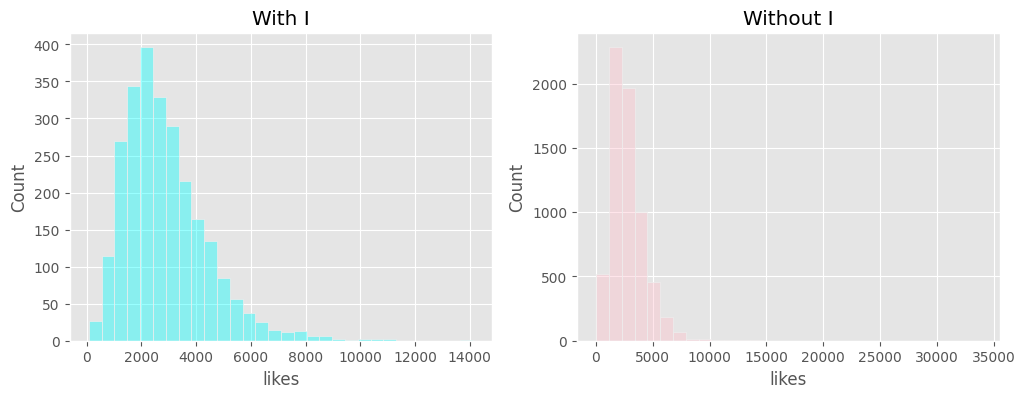

In [95]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
title = ["With I", "Without I"]
color = ["cyan", "pink"]

for i,x in enumerate([True, False]):
    sns.histplot(df[df['I'] == x]['likes'], bins = 30, color = color[i], alpha=0.4, ax = axes[i]).set(title=title[i])
plt.show()

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [96]:
for i,x in enumerate([True, False]):
    print(title[i])
    print("median", df[df['I'] == x]['likes'].median(),", mean", df[df['I'] == x]['likes'].mean())
    print()

With I
median 2588.5 , mean 2879.1828885400314

Without I
median 2497.0 , mean 2784.0432051478474



Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [97]:
alpha = 0.05 
df_true = df[df['I'] == True]['likes']
df_false = df[df['I'] == False]['likes']
 
mean = df_true.mean() - df_false.mean()
std = np.sqrt(df_true.var(ddof=1) / df_true.size + df_false.var(ddof=1) / df_false.size)

alpha = 0.05 

z_obs = mean / std
print("z_obs = ", z_obs)

z_obs =  2.6644610922505323


Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [98]:
z_crit = sts.norm().ppf(1 - alpha/2)
pval = 2 * (1 - sts.norm().cdf(z_obs))

print("z_crit = ", z_crit)
print("pval = ", pval)

z_crit =  1.959963984540054
pval =  0.007711178605442903


**ОТВЕТ:** Наблюдаемое значение больше критического. На уровне значимости 5% гипотеза  о равенстве средних отвергается

In [99]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 2.6644610922505323) < 1e-5

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае проверять гипотезу о равенстве медиан, которые устойчивы к выбросам.

-------------------

## Задание 2  (Тайлер) 

__Люди всё время меня спрашивают, знаю ли я Тайлера Дёрдена?__ Да, знаю. Он делает лучшее мыло в стране. 

__а)__ Тайлер считает партию изделий хорошей, если дисперсия размера не превышает $25$ грамм$^2$. Пока Тайлер летел в самолёте, он измерил $10$ кусков мыла. Выборочная дисперсия оказалась равна $27$ грамм$^2$. Можно ли продавать эту партию или её надо списать в брак? 

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval1`. Наблюдаемое значение статистики запишите в переменную `chi_obs`. Используйте уровень значимости $1\%$.

In [100]:
var_exp = 25
var_obs = 27
n = 10

alpha = 0.01
chi_obs = (n - 1) *  var_obs/var_exp
chi_crit = sts.chi2(n - 1).ppf(1 - alpha)
pval1 = 1 - sts.chi2.cdf(chi_obs, n - 1)

print("chi_obs = ", chi_obs)
print("chi_crit = ", chi_crit)
print("pval1 = ", pval1)

chi_obs =  9.72
chi_crit =  21.665994333461924
pval1 =  0.37362476510008014


**ОТВЕТ:** Наблюдаемое значение меньше критического. На уровне значимости 1% нет оснований отвергать гипотезу о равенстве дисперсий

__б)__ Для того, чтобы уменьшить количество бракованного мыла, Тайлер собирается внедрить новую технологию производства. Тайлер произвёл по старой технологии $100$ кусков мыла. Стандартное отклонение этой партии составило $6$ грамм. Для  новой технологии стандартное отклонение, посчитанное по $100$ кускам мыла, составило $5$ грамм. Правда ли, что новая технология обладает меньшей дисперсией и её нужно внедрить на производстве?

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval2`. Используйте уровень значимости $1\%$.

In [101]:
std_old = 6
std_new = 5
n = 100

alpha = 0.01
F_obs = std_old ** 2 / std_new ** 2
F_crit = sts.f(n - 1, n - 1).ppf(1 - alpha)
pval2 = 1 - sts.f(n - 1, n - 1).cdf(F_obs)

print("F_obs = ", F_obs )
print("F_crit = ", F_crit)
print("pval2 = ", pval2)

F_obs =  1.44
F_crit =  1.601498294840046
pval2 =  0.03557344796202422


**ОТВЕТ:** Наблюдаемое значение меньше критического. На уровне значимости 1% нет оснований отвергать гипотезу о равенстве дисперсий

In [102]:
# проверка того, что задание решено верно
assert np.abs(chi_obs - 9.72) < 1e-1
assert np.abs(F_obs - 1.44) < 1e-1

## Задание 3 (рейтинги президентов) 

В таблице `presidents.csv` представлены рейтинги различных президентов США. Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

__Люди всё время меня спрашивают, знаю ли я Никсона.__ Да, Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [103]:
if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df = pd.read_csv('/content/gdrive/MyDrive/DA/4/presidents.csv')
else:
    df = pd.read_csv('presidents.csv')

print(df.shape)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(30, 5)


,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [104]:
df_melt = pd.melt(df, id_vars = ['year'])
x1 = df_melt[(df_melt['year'] >= 1969) & (df_melt['year'] <= 1971)]["value"]
x2 = df_melt[df_melt['year'] == 1972].query("variable in['Qtr1','Qtr2']")["value"]
x = pd.concat([x1, x2]).dropna()

y1 = df_melt[df_melt['year'] == 1972].query("variable in['Qtr3','Qtr4']")["value"]
y2 = df_melt[df_melt['year'] == 1973]["value"]
y3 = df_melt[df_melt['year'] == 1974].query("variable in['Qtr1','Qtr2']")["value"]
y = pd.concat([y1, y2, y3]).dropna()

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [105]:
diff = x.mean() - y.mean() 
nx, ny = x.size, y.size

diff_var = ((nx - 1)*x.var(ddof=1) + (ny - 1)*y.var(ddof=1))/(nx + ny - 2)
diff_std = np.sqrt(diff_var/nx + diff_var/ny) 
obs = diff / diff_std   
pval = 1 - sts.t(df=nx + ny -2).cdf(obs)

print("obs = ", obs )
print("pval = ", pval)

obs =  3.5640741313229793
pval =  0.0011087344846424374


**ОТВЕТ:** Гипотеза о том, что дисперсия рейтинга не изменилась из-за скандала отвергается.

In [106]:
# проверка того, что задание решено верно
assert np.abs(obs - 3.5640741313229793) < 1e-5

## Задание 4 (сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [107]:
if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df = pd.read_csv('/content/gdrive/MyDrive/DA/4/sleep.csv')
else:
    df = pd.read_csv('sleep.csv')

print(df.shape)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(20, 3)


,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{Студенты до приема имели нормальную продолжительность сна} \\
&H_1: \hspace{2mm} p_1 \ne p_2  \hspace{2mm} \text{Продолжительность сна студентов до приема отклонялась от нормы}
\end{aligned}
$$

In [108]:
group_1 = df[df.group == 1]['extra']
n = group_1.count()

mu = 0
x_bar = group_1.mean()
se = group_1.var(ddof=1)

tobs1 = (x_bar - mu) / np.sqrt(se / n)
pval1 = sts.ttest_1samp(group_1,0, alternative='two-sided')[1]
print("tobs1 =", tobs1 )
print("pval1 =", pval1)

tobs1 = 1.3257101407138212
pval1 = 0.2175977800684489


**ОТВЕТ:** Т.к. pvalue1 больше уровня значимости у нас нет оснований отвергнуть нулевую гипотезу.


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{Студенты до и после приема спали одинаково долго} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{Студенты спали дольше}
\end{aligned}
$$



In [109]:
group_2 = df[df.group == 2]['extra']
n = group_2.count() #group 2

diff = group_2.values - group_1.values
diff_mean = diff.mean()
diff_var = diff.var(ddof=1)

tobs2 = (diff_mean - 0) / np.sqrt(diff_var / n)
pval2 = 1 - sts.t(df = len(diff) - 1).cdf(tobs2)

print("tobs2 = ", tobs2 )
print("pval2 = ", pval2)

tobs2 =  4.062127683382037
pval2 =  0.0014164450986920984


**ОТВЕТ:** Т.к. pvalue2 меньше уровня значимости. На основании имеющихся данных мы отвергаем нулевую гипотезу.


In [110]:
# проверка того, что задание решено верно
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

# другие подобные тесты скрыты от вас 

## Задание 5 (say my name)

__Люди всё время меня спрашивают, знает ли меня Барсик.__  Многие владельцы кошек уверены, что их питомцы могут понимать достаточно большое количество слов, а также узнавать собственное имя. Однако долгое время никто не пытался доказать это экспериментально. Разобраться с этой проблемой [решили учёные из Токийского университета.](https://nplus1.ru/news/2019/04/04/cat-name?utm_source=obrazovach&utm_medium=social&utm_campaign=yaponskie-uchenye-dokazali--chto-domashnie-k)

Было проведено четыре эксперимента с участием домашних кошек и кошек из кошачьих кафе. Учёные использовали метод привыкания-отвыкания (habituation-dishabituation), который часто используется в экспериментах с участием маленьких детей. 

В соответствии с гипотезой, которая лежит в основе этого метода, определить реакцию на какой-либо стимул можно, представив его после схожих с ним стимулов. К примеру, для того, чтобы выяснить, может ли младенец узнать свое имя, ему представляют несколько слов подряд: с каждым новым словом его реакция снижается, но появление имени должно (в случае, если ребенок действительно узнает свое имя) ее вернуть. Этот же метод применили и к кошкам: реакция кошек на слова характеризовалась поворотом головы, движением ушей, вокализацией, движениями хвоста или перемещениями.

В первом эксперименте исследователи проследили за реакцией кошек на собственное имя, произнесенное хозяином, после четырех существительных (16 кошек, живущих дома с двумя другими кошками или меньше). Данные об этом эксперименте находятся в табличке `cats_names.csv`. 

In [111]:
if COLLAB:
    df = pd.read_csv('/content/gdrive/MyDrive/DA/4/cats_names.csv', sep='\t')
else:
    df = pd.read_csv('cats_names.csv', sep='\t')
print(df.shape)
df.head()


(80, 8)


,name,stimuli,Ear moving,Head moving,Tail moving,Vocalising,Displacement,Total Score
0,Cr,Noun 1,1,0,0,0,0,1
1,Cr,Noun 2,1,1,0,0,0,2
2,Cr,Noun 3,1,1,0,0,0,2
3,Cr,Noun 4,0,0,0,0,0,0
4,Cr,Test Cat's Name,1,0,0,0,0,1


Будем проверять гипотезу о том, что кошки понимают своё имя с помощью упрощённой процедуры: 

- Вытащим из таблички все строчки, где экспериментаторы называли $4-$ое существительное. Они помечены в колонке `stimuli` как `Noun 4`. Если в колонке `Total Score` стоит положительное число, будем считать, что кошка среагировала на слово. В вектор `noun4` запишем единицу. В противном случае — ноль. 
- Вытащим по аналогии информацию о том, откликнулась ли кошка на своё имя (пометка `Test Cat's Name`) в колонке `stimuli`. Запишем её в вектор `name`.
- Используем тест о равенстве пропорций для зависимых выборок, чтобы ответить на вопрос "А правда ли кошка откликается на своё имя?" В переменную `pval` запишем $p$-значение, полученное при проверке этой гипотезы. 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{Кошка откликается на свое имя также часто как и на 4е существительное} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{Кошка откликается чаще на свое имя}
\end{aligned}
$$

In [118]:
noun4 = (df[df['stimuli'] == 'Noun 4']['Total Score'] > 0).astype(int).values  
name = (df[df['stimuli'] == 'Test Cat\'s Name']['Total Score'] > 0).astype(int).values 

c, b = 5, 1
z_obs = (c - b) / np.sqrt(c + b - (c - b)**2 / len(name))
pval =  1 - sts.norm.cdf(z_obs)
print("z_obs =", z_obs )
print("pval =", pval)

z_obs = 1.7888543819998317
pval = 0.03681913506015133


In [115]:
# проверка того, что задание решено верно
assert sum(name) == 14
assert np.abs(z_obs - 1.7888543819998317) < 1e-5

**ОТВЕТ:** На уровне значимости 5% мы отвергаем нулевую гипотезу.

Выводы учёных могут отличаться от наших. Результат проверки гипотезы зависит от многих внешних факторов. Например, от громкости произнесённого кошачьего имени. Все такие факторы надо как-то изолировать.

[В оригинальном исследовании](https://www.nature.com/articles/s41598-019-40616-4) учёные реализовывали более сложные статистические процедуры. Они пытались проконтролировать все внешние факторы, которые могли бы повлиять на результаты эксперимента. О том, как это можно делать, мы с вами поговорим в будущем. 

![](https://cdn.nplus1.ru/images/2019/04/04/47a222337ec0984bcec1644f12b4c328.gif)

## Задание 6

Лекции по матану на экономическом факультете читают два преподавателя: Злой и Добрый. Каждый год они чередуются. Среди студентов ходит слух, что в год, когда преподаёт Злой, отчисляют куда больше народу. В таблице `matan.csv` лежит информация по $418$ студентам экономического факультета. 

В столбце `is_angry` стоит единица, если этому студенту преподавал Злой. В столбце `target_1` стоит единица, если человек закончил первый курс. Проверьте гипотезу о том, что Злой отчисляет больше народу. В переменную `pval` запишите $p$-значение, получившееся при проверке гипотезы. 

In [119]:
if COLLAB:
    df = pd.read_csv('/content/gdrive/MyDrive/DA/4/matan.csv', sep='\t')
else:
    df = pd.read_csv('matan.csv', sep='\t')
print(df.shape)
df.head()

(418, 2)


,is_angry,target_1
0,0,1.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,1.0


$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{Злой и добрый отчисляют одинаково} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{Злой отчисляет больше}
\end{aligned}
$$

In [122]:
pos = df[df['is_angry'] == 0]['target_1'].dropna()
neg = df[df['is_angry'] == 1]['target_1'].dropna()

n = (pos.sum() + neg.sum()) / (pos.shape[0] + neg.shape[0])
z_obs  = (neg.mean() - pos.mean()) / np.sqrt(n * (1 - n) * (1 / neg.shape[0] + 1 / pos.shape[0]))
pval = 1 - sts.norm.cdf(z_obs)

print("z_obs =", z_obs )
print("pval =", pval)

z_obs = 0.298976965745299
pval = 0.38247881042266096


**ОТВЕТ:** У нас нет оснований отвергать нулевую гипотезу. 

In [123]:
# проверка того, что задание решено верно
assert np.abs(np.abs(z_obs) - 0.29897)  < 1e-5

## Задание 7

Вася решил проверить известное утверждение о том, что бутерброд падает маслом вниз. Для этого он провёл серию из $200$ испытаний. Бутерброд упал маслом вниз $105$ раз. Маслом вверх $95$ раз. Можно ли утверждать, что бутерброд падает маслом вниз так же часто, как и маслом вверх на уровне значимости $5\%$? В качестве ответа сохраните в `pval` $p$-значение. 

__Примечание:__ для поиска дисперсии используйте смещённый вариант. Либо по формуле $\frac{p\cdot(1-p)}{n}$ либо с помощью `std(ddof=0)`. При поиске `pval` обратите внимание, что алтернатива двусторонняя. А ещё [прочитайте историю](https://absentis.livejournal.com/27153.html) про то, почему Коперник мазал бутеры маслом. 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{Бутерброд одинаково часто падает маслом и хлебом вниз} \\
&H_1: \hspace{2mm} p_1 \ne p_2  \hspace{2mm} \text{Есть различия}
\end{aligned}
$$

In [125]:
alpha = 0.05
n = 200
m = 105

pval = 2 * (1 - sts.norm.cdf(z_obs)) #для двусторонней альтернативы
z_obs = (m / n - 0.5) / np.sqrt(m / n * (1 - m / n) / n)
z_crit = sts.norm.ppf(1 - alpha / 2)
print("z_obs =", z_obs )
print("z_crit =", z_crit )
print("pval =", pval)

z_obs = 0.7079923254047893
z_crit = 1.959963984540054
pval = 0.47895002342035786


**ОТВЕТ:** Наблюдаемое значение меньше критического, у нас нет оснований отвергать нулевую гипотезу. 

In [ ]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 0.70799) < 1e-5